In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Hydrogen

The theory behind this computational analysis is given in the Onenote in the teams drive. However, relevant mathematics will be included.

The energy levels in the system is given by the function:

$$E = -\frac{m_e e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

where $m_e$ is the mass of the electron, $e$ is the fundamental charge of the electron, $\epsilon_{0}$ is the permittivity of free space, $\hbar$ is the value of $\frac{h}{2\pi}$ where $h$ is the value of Planck's constant, $n$ is just an integer and $Z$ is the charge of the nucleus.

However, we can change the system to included the reduced mass of hydrogen, $\mu_H$ where the reduced mass is given by
$$ \mu = \frac{m_em_p}{m_e+m_p} $$

As such, the energy levels in the system is given by the function:

$$E = -\frac{\mu e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

The wavelength from the function is given by the following equation:

$$ \lambda = \frac{hc}{\lvert{E_{f} - E_{i}}\rvert} $$

where $\lambda$ is the wavelength, $E_{f}$ is the energy of the final state, $E_{i}$ is the energy of the initial state.

The Rydberg constant (inifnity) $R_\infty$ is given by the following equation:

$$ R_\infty = \frac{1}{\lambda (\frac{1}{n_{f}^2} - \frac{1}{n_{i}^2})} $$

where $\lambda$ is the wavelength, $n_{f}$ is the quantum number of the final state, $n_{i}$ is the quantum number of the initial state.

The infinty Rydberg constant is now given by the following equation

$$R_\infty = R_H \frac{m_e}{\mu_H}$$

In [2]:
mu_H = (1.67262192e-27*9.1093837015e-31)/(1.67262192e-27+9.1093837015e-31)
print(mu_H)

def calc_E(Z, i):
    E =-1*((mu_H*(1.602176634e-19**4))/(2*((4*np.pi*8.8541878128e-12)**2)*((6.62607015e-34/(2*np.pi))**2)*(i**2))*(Z**2))*(1/1.602176634e-19)
    return E

array = []
for i in range(1,11):
    array.append(calc_E(1, i))

print(array)
def calc_wavelength(E_i, E_f):
    wavelength = (6.62607015e-34*2.99792458e8)/(abs((E_f - E_i)*1.602176634e-19))
    return wavelength

#Balmer Series 
array_ba = []
for i in range(2,10):
    wavelength = calc_wavelength(array[1], array[i])
    array_ba.append(wavelength)
print(array_ba)

def calc_R_H(wavelength, n_f, n_i):
    R = 1/(wavelength*(1/(n_f**2) - 1/(n_i**2)))
    return R

array_R = []
for i in range(0,7):
    R = calc_R_H(array_ba[i], 2, i+3)
    array_R.append(R)
print("The value of the Hydrogen Rydberg constant is:", array_R[1])

R_H = array_R[1]*(9.1093837015e-31/mu_H)
print("The value of the infinity Rydberg constant is:", R_H)

9.10442527651264e-31
[-13.5982872641624, -3.3995718160406, -1.5109208071291558, -0.84989295401015, -0.5439314905664959, -0.37773020178228894, -0.27751606661555916, -0.2124732385025375, -0.16788008968101728, -0.13598287264162398]
[6.564696063390804e-07, 4.862737824733928e-07, 4.341730200655293e-07, 4.1029350396192514e-07, 3.9712358901993746e-07, 3.8901902597871426e-07, 3.8365106863972225e-07, 3.799013925573382e-07]
The value of the Hydrogen Rydberg constant is: 10967758.340179803
The value of the infinity Rydberg constant is: 10973731.56807257


When passed through a diffraction grating, the angles where the spectral lines produced are obeyed by the following equation:

$$ d\sin(\theta) = n\lambda $$

where $d$ is the grating spacing, $\theta$ is the angular seperation, $n$ which is just an integer ($n = 1, 2, 3, ...$) which is equal to $1$ and $\lambda$ which is the wavelength. As such, the angle is given by:

$$ \theta = \arcsin \Biggl( \frac{n\lambda}{d} \Biggr) $$

In [3]:
d = 1.6966e-6

#Since the experimentalists can only see 3 angles it must be noted that only 3 angles work
anglesH = np.zeros(7)
for i in range(0,7):
    anglesH[i] = ((180/np.pi)*np.arcsin(((1)*array_ba[i])/d))    
print(anglesH)
anglesH = anglesH[:-4]
print(anglesH)

[22.76376206 16.65550687 14.82737786 13.99473813 13.53682364 13.2554694
 13.06929735]
[22.76376206 16.65550687 14.82737786]


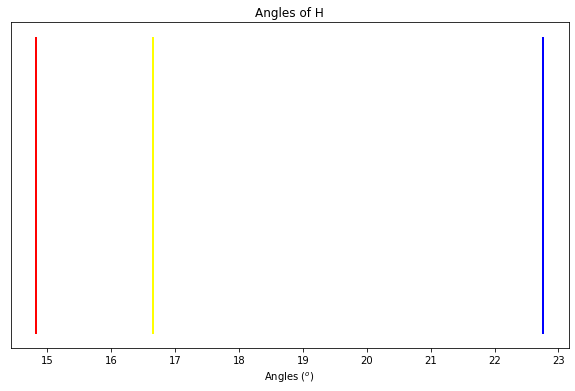

In [4]:
#Display the predicted angles
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

x = [1,1,1]

plt.vlines(anglesH[0], ymin=0, ymax = 1, colors='blue', ls='-', lw=2, label='vline_multiple - full height')
plt.vlines(anglesH[1], ymin=0, ymax = 1, colors='yellow', ls='-', lw=2, label='vline_multiple - full height')
plt.vlines(anglesH[2], ymin=0, ymax = 1, colors='red', ls='-', lw=2, label='vline_multiple - full height')

ax.get_yaxis().set_visible(False)
ax.set_xlabel('Angles ($^o$)')
ax.set_ylabel('')
ax.set_title('Angles of H')
plt.show()

# Deuterium

Now we can change the system to included the reduced mass $\mu$ of deuterium where the reduced mass is given by
$$ \mu = \frac{m_e(m_p+m_n)}{m_e+(m_p+m_n)} $$
As such, the energy levels in this semi classical model are given by 

$$E = -\frac{\mu e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

Since there is only 1 electron we will not include spin orbit effects.
The Rydberg constant (Deuterium) $R_D$ is given by the following equation:

$$ R_D = \frac{1}{\lambda(\frac{1}{n_{f}^2} - \frac{1}{n_{i}^2})} $$

where $\lambda$ is the wavelength, $n_{f}$ is the quantum number of the final state, $n_{i}$ is the quantum number of the initial state.

In [5]:
mu_D = ((9.1091031e-31*(1.6726219e-27+1.674927471e-27)))/(9.1091031e-31+(1.6726219e-27+1.674927471e-27))

print(mu_D)

def calc_E_D(Z, i):
    E =-1*((mu_D*(1.602176634e-19**4))/(2*((4*np.pi*8.8541878128e-12)**2)*((6.62607015e-34/(2*np.pi))**2)*(i**2))*(Z**2))*(1/1.602176634e-19)
    return E

arrayD = []
for i in range(1,11):
    arrayD.append(calc_E_D(1, i))
arrayD

#Balmer Series 
array_baD = []
for i in range(2,10):
    wavelength = calc_wavelength(arrayD[1], arrayD[i])
    array_baD.append(wavelength)
array_baD
def calc_R_D(wavelength, n_f, n_i):
    R = 1/(wavelength*(1/(n_f**2) - 1/(n_i**2)))
    return R

array_R_D = []
for i in range(0,7):
    R = calc_R_D(array_baD[i], 2, i+3)
    array_R_D.append(R)
print("The value of the Deuteriun Rydberg constant is:", array_R[0])

R_infinity_D = array_R_D[0]*(9.1093837015e-31/mu_D)
print("The value of the inifinity Rydberg constant is:", R_infinity_D)

9.10662507271834e-31
The value of the Deuteriun Rydberg constant is: 10967758.340179801
The value of the inifinity Rydberg constant is: 10973731.568072572


In [6]:
d = 1.6966e-6

#Since the experimentalists can only see 3 angles it must be noted that only 3 angles work
anglesD = np.zeros(7)
for i in range(0,7):
     anglesD[i] = ((180/np.pi)*np.arcsin(((1)*array_baD[i])/d))
        
anglesD = anglesD[:-4]
print(anglesD)

[22.75795452 16.65136632 14.82371403]


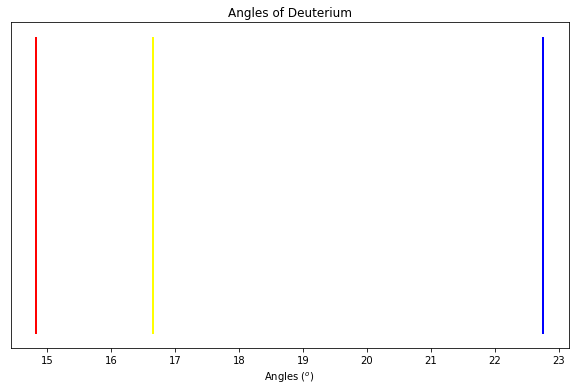

In [7]:
#Display the predicted angles
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

x = [1,1,1]

plt.vlines(anglesD[0], ymin=0, ymax = 1, colors='blue', ls='-', lw=2, label='vline_multiple - full height')
plt.vlines(anglesD[1], ymin=0, ymax = 1, colors='yellow', ls='-', lw=2, label='vline_multiple - full height')
plt.vlines(anglesD[2], ymin=0, ymax = 1, colors='red', ls='-', lw=2, label='vline_multiple - full height')

ax.get_yaxis().set_visible(False)
ax.set_xlabel('Angles ($^o$)')
ax.set_ylabel('')
ax.set_title('Angles of Deuterium')
plt.show()

# Helium ion

Now we can change the system to included the reduced mass $\mu$ of the helium ion where the reduced mass is given by
$$ \mu = \frac{2m_e(m_p+m_n)}{m_e+2(m_p+m_n)} $$

We can do the problem two ways. One way is by using the Dirac equation for energy levels and the second is by using Schrodinger's equation.

Looking at this problem using the energy levels from Dirac's equation of the atom

$$E = -\mu c^2 \bigg( 1+\bigg( \frac{2\alpha}{Z-1+(1-(4\alpha)^2)} \bigg)^2 \bigg)^{-\frac{1}{2}}$$

where $\alpha$ is the coupling constant where $\alpha = \frac{1}{137}$. Since there is only 1 electron we will not include spin orbit effects.

The Helium Rydberg constant $R_{He}$ is given by the following equation:

$$ R_{He} = \frac{1}{\lambda (\frac{1}{n_{f}^2} - \frac{1}{n_{i}^2})} $$

where $\lambda$ is the wavelength, $n_{f}$ is the quantum number of the final state, $n_{i}$ is the quantum number of the initial state. The infinity Rydberg constant is now given by the following equation

$$R_\infty = R_{He}\frac{m_e}{\mu_{He}}\frac{1}{Z^2}$$

In [33]:
mu_He = (9.1091031e-31*(2*1.67262192369e-27+2*1.67492749804e-27))/(9.1091031e-31+(2*1.67262192369e-27+2*1.67492749804e-27))
print(mu_He)

def calc_E_He1(Z, i):
    alpha = (1.602176634e-19**2)/(4*np.pi*8.8541878128e-12*(6.62607015e-34/(2*np.pi))*2.99792458e8)
    square = 1+((2*alpha)/(i-1+np.sqrt(1-(4*(alpha)**2))))**2
    E =-1*(mu_He*(2.99792458e8**2)*(square)**-0.5)*(1/1.602176634e-19)
    return E

arrayHe = []
for i in range(1,11):
    arrayHe.append(calc_E_He1(2, i))
print(arrayHe)

#Balmer Series 
array_baHe = []
for i in range(4,10):
    wavelength = calc_wavelength(arrayHe[3], arrayHe[i])
    array_baHe.append(wavelength)

print(array_baHe)

def calc_R_He(wavelength, n_f, n_i):
    R = 1/(wavelength*(1/(n_f**2) - 1/(n_i**2)))
    return R

array_R_He = []
for i in range(0,6):
    R = calc_R_He(array_baHe[i], 4, i+5)
    array_R_He.append(R)
print(array_R_He)
print("The value of the Helium Rydberg constant is", array_R_He[0])
R_He = array_R_He[0]*(9.1093837015e-31/mu_He)
print("The value of the infinty Rydberg constant is:", R_He/4)

9.107863917825278e-31
[-510859.27979368204, -510900.0920555546, -510907.6500964949, -510910.29538139, -510911.51975781284, -510912.1848459235, -510912.58587064577, -510912.84614987846, -510913.0245957847, -510913.15223669517]
[1.0126313780835862e-06, 6.561869579251866e-07, 5.413000655750809e-07, 4.860660581126306e-07, 4.5428530156541014e-07, 4.339883724945124e-07]
[43890052.59599593, 43889930.533004515, 43889844.59541039, 43889782.01063774, 43889735.084441654, 43889699.02150984]
The value of the Helium Rydberg constant is 43890052.59599593
The value of the infinty Rydberg constant is: 10974344.077359902


Looking at this problem using the energy levels from Schrodinger's model of the atom

$$E = -\frac{\mu e^4}{32\pi^2\epsilon_{0}^2\hbar^2n^2}Z^2$$

Therefore, we must use the less used Bohr's model in order to predict the angles measured 

Since there is only 1 electron we will not include spin orbit effects.

In [32]:
def calc_E_He2(Z, i):
    E =-1*((mu_He*(1.602176634e-19**4))/(2*((4*np.pi*8.8541878128e-12)**2)*((6.62607015e-34/(2*np.pi))**2)*(i**2))*(Z**2))*(1/1.602176634e-19)
    return E

arrayHe = []
for i in range(1,11):
    arrayHe.append(calc_E_He2(2, i))
print(arrayHe)

print(array_baHe)
def calc_R_He(wavelength, n_f, n_i):
    R = 1/(wavelength*(1/(n_f**2) - 1/(n_i**2)))
    return R

array_R_He = []
for i in range(0,6):
    R = calc_R_He(array_baHe[i], 4, i+5)
    array_R_He.append(R)
print(array_R_He)
print("The value of the Helium Rydberg constant is", array_R_He[0])
R_He = array_R_He[0]*(9.1093837015e-31/mu_He)
print("The value of the infinty Rydberg constant is:", R_He/4)

[-54.413692750929044, -13.603423187732261, -6.045965861214339, -3.4008557969330653, -2.1765477100371617, -1.5114914653035847, -1.110483525529164, -0.8502139492332663, -0.6717739845793709, -0.5441369275092904]
[1.0126313780835862e-06, 6.561869579251866e-07, 5.413000655750809e-07, 4.860660581126306e-07, 4.5428530156541014e-07, 4.339883724945124e-07]
[43890052.59599593, 43889930.533004515, 43889844.59541039, 43889782.01063774, 43889735.084441654, 43889699.02150984]
The value of the Helium Rydberg constant is 43890052.59599593
The value of the infinty Rydberg constant is: 10974344.077359902


In [11]:
d = 1.6966e-6

#Since the experimentalists can only see 3 angles it must be noted that only 3 angles work
anglesHe = np.zeros(5)
for i in range(0,5):
    anglesHe[i] = ((180/np.pi)*np.arcsin(((1)*array_baHe[i])/d))
print(anglesHe)

[36.64528654 22.75341084 18.60547679 16.64818476 15.53114636]


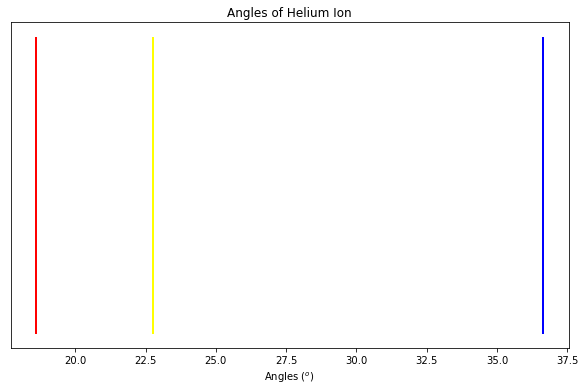

In [12]:
#Display the predicted angles
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

plt.vlines(anglesHe[0], ymin=0, ymax = 1, colors='blue', ls='-', lw=2, label='vline_multiple - full height')
plt.vlines(anglesHe[1], ymin=0, ymax = 1, colors='yellow', ls='-', lw=2, label='vline_multiple - full height')
plt.vlines(anglesHe[2], ymin=0, ymax = 1, colors='red', ls='-', lw=2, label='vline_multiple - full height')

ax.get_yaxis().set_visible(False)
ax.set_xlabel('Angles ($^o$)')
ax.set_ylabel('')
ax.set_title('Angles of Helium Ion')
plt.show()

[22.76376206 16.65550687 14.82737786]


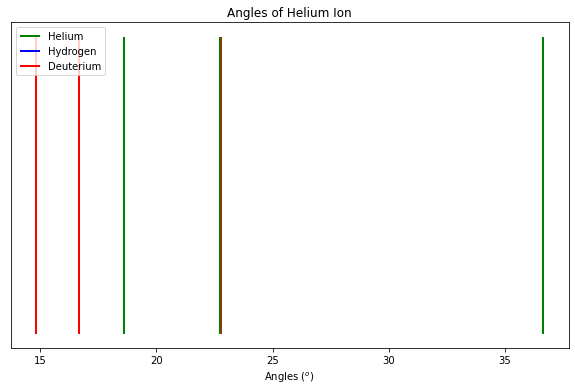

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

print(anglesH)


plt.vlines(anglesHe[0], ymin=0, ymax = 1, colors='green', ls='-', lw=2, label='Helium')
plt.vlines(anglesH[0], ymin=0, ymax = 1, colors='blue', ls='-', lw=2, label='Hydrogen')
plt.vlines(anglesD[0], ymin=0, ymax = 1, colors='red', ls='-', lw=2, label='Deuterium')
plt.vlines(anglesHe[1], ymin=0, ymax = 1, colors='green', ls='-', lw=2)
plt.vlines(anglesH[1], ymin=0, ymax = 1, colors='blue', ls='-', lw=2)
plt.vlines(anglesD[1], ymin=0, ymax = 1, colors='red', ls='-', lw=2 )
plt.vlines(anglesHe[2], ymin=0, ymax = 1, colors='green', ls='-', lw=2)
plt.vlines(anglesH[2], ymin=0, ymax = 1, colors='blue', ls='-', lw=2)
plt.vlines(anglesD[2], ymin=0, ymax = 1, colors='red', ls='-', lw=2 )

ax.get_yaxis().set_visible(False)
plt.legend(loc="upper left")
ax.set_xlabel('Angles ($^o$)')
ax.set_ylabel('')
ax.set_title('Angles of Helium Ion')
plt.show()

[22.76376206 16.65550687 14.82737786]


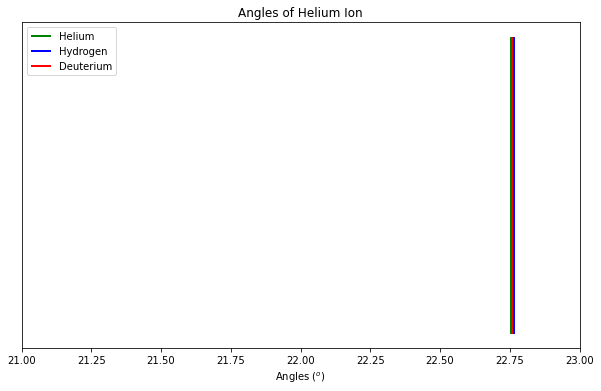

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

print(anglesH)


plt.vlines(anglesHe[0], ymin=0, ymax = 1, colors='green', ls='-', lw=2, label='Helium')
plt.vlines(anglesH[0], ymin=0, ymax = 1, colors='blue', ls='-', lw=2, label='Hydrogen')
plt.vlines(anglesD[0], ymin=0, ymax = 1, colors='red', ls='-', lw=2, label='Deuterium')
plt.vlines(anglesHe[1], ymin=0, ymax = 1, colors='green', ls='-', lw=2)
plt.vlines(anglesH[1], ymin=0, ymax = 1, colors='blue', ls='-', lw=2)
plt.vlines(anglesD[1], ymin=0, ymax = 1, colors='red', ls='-', lw=2 )
plt.vlines(anglesHe[2], ymin=0, ymax = 1, colors='green', ls='-', lw=2)
plt.vlines(anglesH[2], ymin=0, ymax = 1, colors='blue', ls='-', lw=2)
plt.vlines(anglesD[2], ymin=0, ymax = 1, colors='red', ls='-', lw=2 )

ax.get_yaxis().set_visible(False)
plt.legend(loc="upper left")
ax.set_xlabel('Angles ($^o$)')
ax.set_ylabel('')
ax.set_title('Angles of Helium Ion')
plt.xlim(21, 23)
plt.show()

9.108144442965707e-31


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


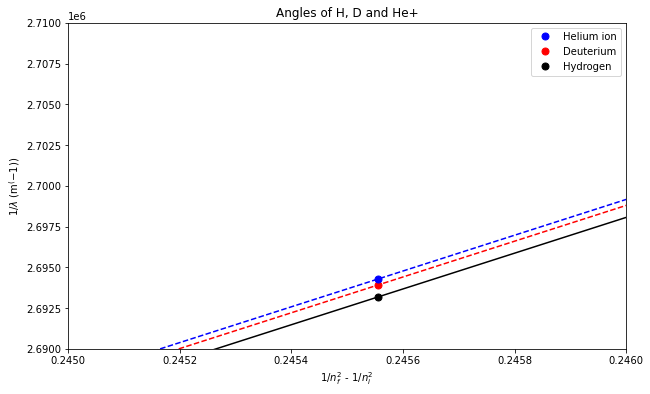

In [15]:
n=100

mu_H = (1.67262192e-27*9.1093837015e-31)/(1.67262192e-27+9.1093837015e-31)
mu_D = ((9.1093837015e-31*(1.6726219e-27+1.674927471e-27)))/(9.1093837015e-31+(1.6726219e-27+1.674927471e-27))
mu_He = (9.1093837015e-31*2*(1.6726219e-27+1.674927471e-27))/(9.1093837015e-31+2*(1.6726219e-27+1.674927471e-27))
print(mu_He)

R_infinity = (9.1093837015e-31*1.602176634e-19**4)/(8*(8.854187817e-12**2)*(6.62607015e-34**3)*2.99792458e8)

R_H = R_infinity*(mu_H/9.1093837015e-31)
R_D = R_infinity*(mu_D/9.1093837015e-31)
R_He = R_infinity*(mu_He/9.1093837015e-31)



p =np.zeros(n)
inversearraybaH = np.zeros(n)
inversearraybaD = np.zeros(n)
inversearraybaHe = np.zeros(n)

for i in range(0,n):
    p[i] = (1/2**2) - (1/(i+3)**2)
    inversearraybaH[i] = R_H*p[i]
    inversearraybaD[i] = R_D*p[i]
    inversearraybaHe[i] = R_He*p[i]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

ax.errorbar(p,           
             inversearraybaH,                   
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "Hydrogen",
             )
ax.errorbar(p,           
             inversearraybaD,                   
             marker='o',             
             markersize = 7,        
             color='red',         
             ecolor='red',        
             markerfacecolor='red',
             linestyle='none',       
             capsize=6,  
             label = "Deuterium",
             )
ax.errorbar(p,           
             inversearraybaHe,                   
             marker='o',             
             markersize = 7,        
             color='blue',         
             ecolor='blue',        
             markerfacecolor='blue',
             linestyle='none',       
             capsize=6,  
             label = "Helium ion",
             )

def straight_fit(z, a, b):
    mag = a * z + b
    return(mag)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)

popt, pcov = curve_fit(straight_fit, p, inversearraybaH)

a = popt[0]
b = popt[1]

z = np.linspace(0.125, 0.26, 100)

ax.plot(z, straight_fit(z, a, b), color='black', ls='-', label='best fit')

popt, pcov = curve_fit(straight_fit, p, inversearraybaD)

c = popt[0]
d = popt[1]

ax.plot(z, straight_fit(z, c, d), color='red', ls='--', label='best fit')

popt, pcov = curve_fit(straight_fit, p, inversearraybaHe)

e = popt[0]
f = popt[1]

ax.plot(z, straight_fit(z, e, f), color='blue', ls='--', label='best fit')

ax.set_xlabel('1/$n_f^2$ - 1/$n_i^2$')
ax.set_ylabel('$1/\lambda}$ (m$^(-1)$)')
ax.set_title('Angles of H, D and He+')
plt.xlim(0.245, 0.246)
plt.ylim(2.69e6, 2.71e6)
plt.show()

# When $\theta$ is not perpendicular

The general formula for a diffraction grating where

$$ \frac{d(\sin(\theta_+) + \sin(\theta_-))}{2m}=\lambda $$

this is including the possibility that the angle of incidence is not perpendicular to the diffraction grating (where $\theta_i \not= 0$). In this case,

$$ \theta_+ = \alpha_+ + \theta_i $$
$$ \theta_- = \alpha_- + \theta_i $$

Setting $\alpha_+ = 0.5^o$ and $\alpha_- = 0.5^o$ we can calculate the realistic value of the $ \theta_- $ and $ \theta_+$.

In [29]:
alphaplus = 0.5
alphaminus = 0.5
d = 1.6966e-6

#Since the experimentalists can only see 3 angles it must be noted that only 3 angles work
anglesD_plusnew = np.zeros(7)
anglesH_plusnew = np.zeros(7)
anglesHe_plusnew = np.zeros(5)
anglesD_minusnew = np.zeros(7)
anglesH_minusnew = np.zeros(7)
anglesHe_minusnew = np.zeros(5)

theta_i = (np.sin(alphaplus)+np.sin(alphaminus))/(2 - np.cos(alphaplus)+np.cos(alphaminus))

for i in range(0,7):
        anglesD_plusnew[i] = (180/np.pi)*np.arcsin((((1)*array_baD[i])/d)+np.sin(theta_i))
        anglesH_plusnew[i] = (180/np.pi)*np.arcsin((((1)*array_ba[i])/d)+np.sin(theta_i))
for i in range(0,5):
        anglesHe_plusnew[i] = (180/np.pi)*np.arcsin((((1)*array_baHe[i])/d)+np.sin(theta_i))
for i in range(0,7):
        anglesD_minusnew[i] = (180/np.pi)*np.arcsin((((-1)*array_baD[i])/d)+np.sin(theta_i))
        anglesH_minusnew[i] = (180/np.pi)*np.arcsin((((-1)*array_ba[i])/d)+np.sin(theta_i))
for i in range(0,5):
        anglesHe_minusnew[i] = (180/np.pi)*np.arcsin((((-1)*array_baHe[i])/d)+np.sin(theta_i))
        
print(anglesD_minusnew)
print(anglesD)

[ 4.26850466 10.06248968 11.85430097 12.67938461 13.13556553 13.41671218
 13.60310707]
[22.75795452 16.65136632 14.82371403]


C:\Users\User\AppData\Local\Temp/ipykernel_17384/3496487876.py:19: RuntimeWarning: invalid value encountered in arcsin
  anglesHe_plusnew[i] = (180/np.pi)*np.arcsin((((1)*array_baHe[i])/d)+np.sin(theta_i))
